# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
import pandas.util.testing as tm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from loguru import logger

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv(r"data/fifa19.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18207 non-null  int64  
 1   Overall          18207 non-null  int64  
 2   Potential        18207 non-null  int64  
 3   Crossing         18159 non-null  float64
 4   Finishing        18159 non-null  float64
 5   HeadingAccuracy  18159 non-null  float64
 6   ShortPassing     18159 non-null  float64
 7   Volleys          18159 non-null  float64
 8   Dribbling        18159 non-null  float64
 9   Curve            18159 non-null  float64
 10  FKAccuracy       18159 non-null  float64
 11  LongPassing      18159 non-null  float64
 12  BallControl      18159 non-null  float64
 13  Acceleration     18159 non-null  float64
 14  SprintSpeed      18159 non-null  float64
 15  Agility          18159 non-null  float64
 16  Reactions        18159 non-null  float64
 17  Balance     

In [6]:
fifa.sample(5)

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
14170,25,61,67,15.0,16.0,14.0,24.0,11.0,17.0,16.0,...,22.0,23.0,18.0,11.0,16.0,58.0,61.0,55.0,64.0,59.0
17613,19,53,68,22.0,53.0,67.0,46.0,40.0,41.0,30.0,...,52.0,47.0,25.0,21.0,13.0,14.0,5.0,7.0,13.0,10.0
6526,27,69,71,40.0,19.0,72.0,53.0,21.0,36.0,43.0,...,48.0,59.0,60.0,67.0,64.0,9.0,7.0,8.0,9.0,11.0
13380,24,62,64,54.0,34.0,50.0,52.0,29.0,59.0,60.0,...,45.0,43.0,53.0,60.0,57.0,13.0,14.0,15.0,13.0,16.0
453,28,80,80,63.0,53.0,69.0,81.0,56.0,64.0,60.0,...,52.0,81.0,79.0,79.0,77.0,15.0,13.0,9.0,14.0,9.0


In [7]:
fifa.dropna(inplace=True)

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [8]:
def q1():
    # Retorne aqui o resultado da questão 1.
    pca = PCA(n_components=1)
    
    pca.fit_transform(fifa)
    
    _evr = pca.explained_variance_ratio_

    return float(round(_evr[0],3))

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [9]:
def q2():
    # Retorne aqui o resultado da questão 2.
    pca = PCA(n_components=0.95)
    result = pca.fit_transform(fifa)

    return result.shape[1]

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [10]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [11]:
def q3():
    # Retorne aqui o resultado da questão 3.
    pca = PCA(n_components=2).fit(fifa)
    
    return tuple(pca.components_.dot(x).round(3))

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [23]:
X = fifa.drop(['Overall'], axis = 1)
y = fifa[['Overall']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
rfe = RFE(lr_model)
rfe.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [27]:
feat_importances = pd.DataFrame({
    'feat': X_train.columns,
    'corr': rfe.get_support(),
    'coef': pd.Series(lr_model.coef_[0])})

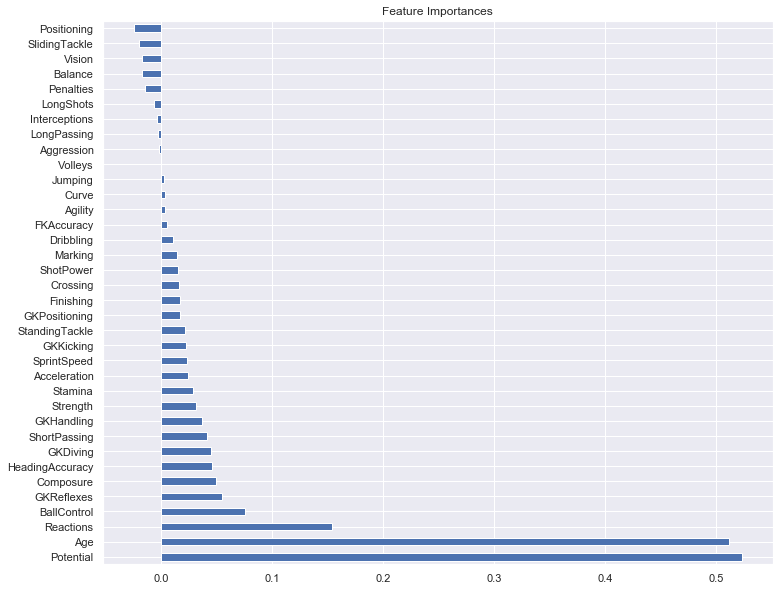

In [28]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.grid()
plt.title('Feature Importances')
pd.Series(lr_model.coef_[0], index= X_train.columns).nlargest(45).plot(kind='barh')
plt.show();

In [30]:
def q4():
    # Retorne aqui o resultado da questão 4.
    rfe = RFE(LinearRegression(), n_features_to_select=5, step=1).fit(X, y)

    return X.columns[rfe.support_].tolist()